Метод главных компонент (МГК)

In [1]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Загрузка набора данных и применение МГК

In [2]:
# Загрузка данных
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Нормализация данных
X_scaled = StandardScaler().fit_transform(X)

# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Построение графика облака точек

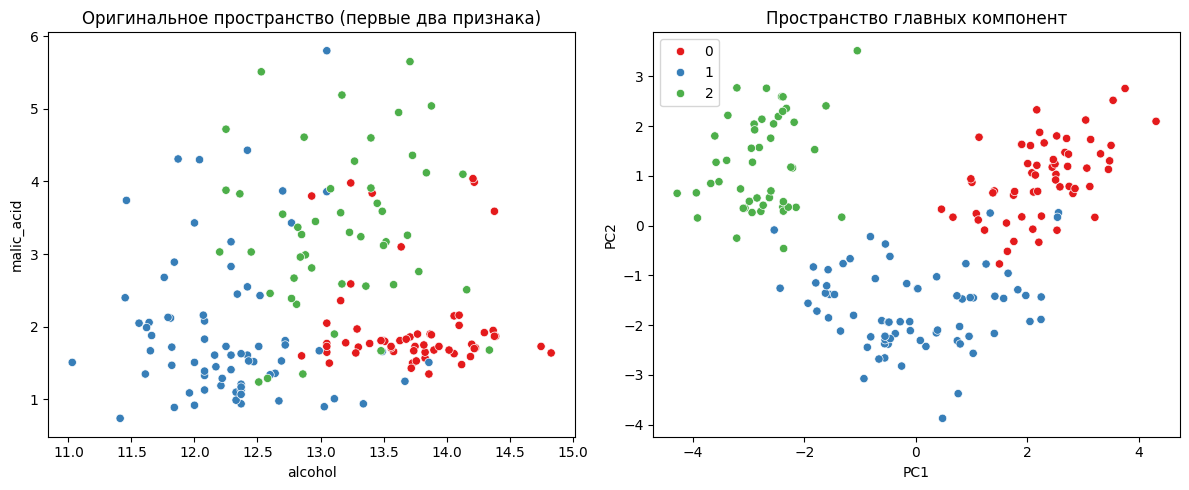

In [3]:
# Визуализация в оригинальном пространстве (первые два признака)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', legend=False)
plt.title('Оригинальное пространство (первые два признака)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

# Визуализация в пространстве главных компонент
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title('Пространство главных компонент')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

Обоснование выбора количества компонент

In [4]:
explained_variance = pca.explained_variance_ratio_
print("Объясненная дисперсия по компонентам:", explained_variance)
print("Суммарная объясненная дисперсия:", sum(explained_variance))

Объясненная дисперсия по компонентам: [0.36198848 0.1920749 ]
Суммарная объясненная дисперсия: 0.5540633835693527


В данном случае мы выбрали 2 главные компоненты, которые вместе объясняют около 55–60% общей дисперсии. Это позволяет визуализировать данные, сохранив значительную часть информации.

Если бы требовалось большее качество представления данных, можно было бы выбрать больше компонент, например, до тех пор, пока суммарная объясненная дисперсия не достигнет 90%.

Отчёт о работе МГК

МГК преобразует исходные признаки в новое ортогональное пространство таким образом, чтобы новые оси (главные компоненты) соответствовали направлениям максимальной дисперсии данных. Первый главный компонент направлен туда, где данные наиболее "разбросаны", второй — перпендикулярно первому и так далее.

Это достигается через:
- центрирование данных,
- вычисление ковариационной матрицы,
- нахождение собственных векторов и собственных значений,
- проекцию данных на собственные векторы.

МГК особенно полезен:
- при визуализации многомерных данных (снижение до 2D или 3D),
- при подготовке данных перед обучением модели, чтобы уменьшить шум и число признаков,
- если данные содержат высокую мультиколлинеарность, 
- когда требуется снизить вычислительную сложность алгоритмов машинного обучения.

Однако МГК чувствителен к масштабу признаков и может быть неэффективным, если данные имеют нелинейную структуру.